## Tampa Bay, FL - Simple workflow

### Standardize, clean and wrangle Water Quality Portal data in Tampa Bay, FL into more analytic-ready formats using the harmonize_wq package

US EPA’s Water Quality Portal (WQP) aggregates water quality, biological, and physical data provided by many organizations and has become an essential resource with tools to query and retrieval data using python or R. Given the variety of data and variety of data originators, using the data in analysis often requires data cleaning to ensure it meets the required quality standards and data wrangling to get it in a more analytic-ready format. Recognizing the definition of analysis-ready varies depending on the analysis, the harmonixe_wq package is intended to be a flexible water quality specific framework to help:
- Identify differences in data units (including speciation and basis)
- Identify differences in sampling or analytic methods
- Resolve data errors using transparent assumptions
- Reduce data to the columns that are most commonly needed
- Transform data from long to wide format

Domain experts must decide what data meets their quality standards for data comparability and any thresholds for acceptance or rejection.

#### Simple workflow

This example steps through a typical workflow in Tampa Bay, FL to demonstrate commonly used functionality

##### Install the required libraries

In [1]:
import sys
#!python -m pip uninstall harmonize-wq --yes
# Use pip to install the package from pypi or the latest from github
#!{sys.executable} -m pip install harmonize-wq
# For latest dev version
#!{sys.executable} -m pip install git+https://github.com/USEPA/harmonize-wq.git@new_release_0-3-8

##### Create dataretrieval query using a polygon for Area Of Interest

In [2]:
from harmonize_wq import wrangle

In [3]:
# Read geometry for Area of Interest from geojson file url
# NOTE: alternatively you can direct it to a local shapefile
aoi_url = r'https://github.com/USEPA/Coastal_Ecological_Indicators/raw/master/DGGS_Coastal/temperature_data/TampaBay.geojson'

<Axes: >

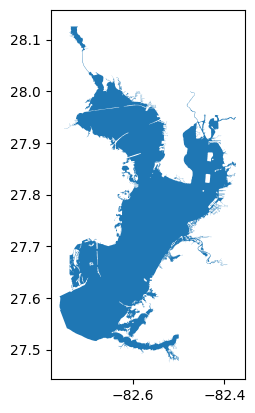

In [4]:
# Map aoi
aoi_gdf = wrangle.as_gdf(aoi_url)
# geoJSON should be WGS1984 standard, but this one isn't
aoi_gdf.to_crs(4326, inplace=True)
aoi_gdf.plot()

In [5]:
# Build query
query = {'characteristicName': ['Phosphorus',
                                'Temperature, water',
                                'Depth, Secchi disk depth',
                                'Dissolved oxygen (DO)',
                                'Salinity',
                                'pH',
                                'Nitrogen',
                                'Conductivity',
                                'Organic carbon',
                                'Chlorophyll a',
                                'Turbidity',
                                'Sediment',
                                'Fecal Coliform',
                                'Escherichia coli']}
query['bBox'] = wrangle.get_bounding_box(aoi_gdf)
query['dataProfile'] = 'narrowResult'

##### Retrieve data

Stations will be retrieved using the query criteria seperately after results. md_narrow is metadata documenting the query not used here but meant for reproducibility

In [6]:
import dataretrieval.wqp as wqp

In [7]:
# Query for results
# Note: large quieries like this can take up a lot of RAM and may give a DtypeWarning,
# set low_memory=False or provide dataTypes for columns to use less memory. 
res_narrow, md_narrow = wqp.get_results(**query)

/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/dataretrieval/wqp.py:153: DtypeWarning: Columns (9,10,13,15,17,19,22,23,28,31,33,36,38,56,57,58,60,61,62,63,64,65,70,71,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(StringIO(response.text), delimiter=",")


In [8]:
# Look at initial results (input)
df = res_narrow
df

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,AnalysisEndTime/TimeZoneCode,ResultLaboratoryCommentCode,ResultLaboratoryCommentText,ResultDetectionQuantitationLimitUrl,LaboratoryAccreditationIndicator,LaboratoryAccreditationAuthorityName,TaxonomistAccreditationIndicator,TaxonomistAccreditationAuthorityName,LabSamplePreparationUrl,ProviderName
0,21FLHILL_WQX,Environmental Protection Commission of Hillsbo...,21FLHILL_WQX-130612585-W,2013-06-12,11:01:00,EST,21FLHILL_WQX-585,STORET-301235413,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
1,21FLSEAS_WQX,Florida Department of Environmental Protection,21FLSEAS_WQX-481901119134,2013-11-19,14:01:00,EST,21FLSEAS_WQX-48SEAS190,STORET-310535134,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
2,21FLHILL_WQX,Environmental Protection Commission of Hillsbo...,21FLHILL_WQX-130702047-M,2013-07-02,11:01:00,EST,21FLHILL_WQX-047,STORET-300620295,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
3,21FLHILL_WQX,Environmental Protection Commission of Hillsbo...,21FLHILL_WQX-130716021,2013-07-16,11:01:00,EST,21FLHILL_WQX-021,STORET-300666279,NaN,NaN,...,NaN,NaN,NaN,https://www.waterqualitydata.us/data/providers...,NaN,NaN,NaN,NaN,NaN,STORET
4,21FLHILL_WQX,Environmental Protection Commission of Hillsbo...,21FLHILL_WQX-131216112-M,2013-12-16,12:01:00,EST,21FLHILL_WQX-112,STORET-301229196,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531360,21FLBSG,City of Tampa Bay Study Group (Florida),21FLBSG-1979311F-1979-0,1979-10-31,00:00:00,EST,21FLBSG-13,STORET-100013954247.0000000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
1531361,21FLBSG,City of Tampa Bay Study Group (Florida),21FLBSG-1979174-1979-0,1979-09-17,00:00:00,EST,21FLBSG-13,STORET-100013931237.0000000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
1531362,21FLBSG,City of Tampa Bay Study Group (Florida),21FLBSG-1979192F-1979-0,1979-11-19,00:00:00,EST,21FLBSG-13,STORET-100014001269.0000000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
1531363,21FLBSG,City of Tampa Bay Study Group (Florida),21FLBSG-1979170-1979-0,1979-10-17,00:00:00,EST,21FLBSG-13,STORET-100013991881.0000000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET


##### Harmonize data using defaults

In [9]:
from harmonize_wq import harmonize
from harmonize_wq import location
from harmonize_wq import visualize

In [10]:
# Harmonize it and look at how it changed (output)
# Note: 'ignore' unit dimensionality errors will warn when they are encountered and replace with NaN
# Note: depending on the Pint version this may cause a UnitStrippedWarning
df_harmonized = harmonize.harmonize_all(df, errors='ignore')
df_harmonized

/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:158: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for bad_meas in pandas.unique(bad_measures):


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/clean.py:360: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ResultMeasureValue: missing (NaN) result' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_out.loc[mask & (df_out["QA_flag"].isna()), "QA_flag"] = flag


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:663: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[<Quantity(0.00594, 'milligram / liter')>
 <Quantity(0.00145, 'milligram / liter')>
 <Quantity(0.00277, 'milligram / liter')> ...
 <Quantity(0.03108, 'milligram / liter')>
 <Quantity(0.04822, 'milligram / liter')>
 <Quantity(0.06407, 'milligram / liter')>]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_out.loc[m_mask, self.out_col] = convert_unit_series(**params)


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:158: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for bad_meas in pandas.unique(bad_measures):


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:663: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[<Quantity(626.0, 'microsiemens / centimeter')>
 <Quantity(688.0, 'microsiemens / centimeter')>
 <Quantity(606.0, 'microsiemens / centimeter')>
 <Quantity(606.0, 'microsiemens / centimeter')>
 <Quantity(633.0, 'microsiemens / centimeter')>
 <Quantity(776.0, 'microsiemens / centimeter')>
 <Quantity(776.0, 'microsiemens / centimeter')>
 <Quantity(775.0, 'microsiemens / centimeter')>
 <Quantity(776.0, 'microsiemens / centimeter')>
 <Quantity(775.0, 'microsiemens / centimeter')>
 <Quantity(20500.0, 'microsiemens / centimeter')>]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_out.loc[m_mask, self.out_col] = convert_unit_series(**params)


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:158: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for bad_meas in pandas.unique(bad_measures):


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:663: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[<Quantity(0.8, 'meter')> <Quantity(2.2, 'meter')>
 <Quantity(2.7, 'meter')> ... <Quantity(1.4, 'meter')>
 <Quantity(1.3, 'meter')> <Quantity(1.3, 'meter')>]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_out.loc[m_mask, self.out_col] = convert_unit_series(**params)


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:158: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for bad_meas in pandas.unique(bad_measures):


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:663: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[<Quantity(9.32, 'milligram / liter')>
 <Quantity(8.08, 'milligram / liter')>
 <Quantity(4.9, 'milligram / liter')> ...
 <Quantity(8.2, 'milligram / liter')> <Quantity(7.9, 'milligram / liter')>
 <Quantity(10.4, 'milligram / liter')>]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_out.loc[m_mask, self.out_col] = convert_unit_series(**params)


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:158: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for bad_meas in pandas.unique(bad_measures):


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/convert.py:128: UserWarning: WARNING: 'cfu/100mL' converted to NaN
  warn(f"WARNING: '{unit}' converted to NaN")
/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/convert.py:128: UserWarning: WARNING: 'CFU/100mL' converted to NaN
  warn(f"WARNING: '{unit}' converted to NaN")
/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/convert.py:128: UserWarning: WARNING: 'MPN/100mL' converted to NaN
  warn(f"WARNING: '{unit}' converted to NaN")
/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:663: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_out.loc[m_mask, self.out_col] = convert_unit_series(**params)


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:158: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for bad_meas in pandas.unique(bad_measures):


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/convert.py:128: UserWarning: WARNING: 'cfu/100mL' converted to NaN
  warn(f"WARNING: '{unit}' converted to NaN")
/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/convert.py:128: UserWarning: WARNING: 'CFU/100mL' converted to NaN
  warn(f"WARNING: '{unit}' converted to NaN")


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/convert.py:128: UserWarning: WARNING: 'MPN/100mL' converted to NaN
  warn(f"WARNING: '{unit}' converted to NaN")
/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:663: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan ... nan nan
 <Quantity(2.0, 'Colony_Forming_Units / milliliter')>]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_out.loc[m_mask, self.out_col] = convert_unit_series(**params)


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:158: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for bad_meas in pandas.unique(bad_measures):


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/basis.py:343: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'as N' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_out.loc[mask, basis_col] = basis


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:484: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['as N' 'as N' 'as N' 'as N' 'as N' 'as N' 'as N' 'as N' nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 'as N'
 nan nan nan 'as N' nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan 'as N' nan 'as N' nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan 'as N' nan nan nan nan
 'as N' nan 'as N' 'as N' nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]' has dtype incompatible with float64, please explicitly 

/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:663: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[<Quantity(0.39, 'milligram / liter')>
 <Quantity(0.4475, 'milligram / liter')>
 <Quantity(0.425, 'milligram / liter')>
 <Quantity(0.4625, 'milligram / liter')>
 <Quantity(0.33625, 'milligram / liter')>
 <Quantity(0.28, 'milligram / liter')>
 <Quantity(0.5625, 'milligram / liter')>
 <Quantity(0.21875, 'milligram / liter')>
 <Quantity(0.629, 'milligram / liter')>
 <Quantity(0.505, 'milligram / liter')>
 <Quantity(0.253, 'milligram / liter')>
 <Quantity(0.325, 'milligram / liter')>
 <Quantity(0.253, 'milligram / liter')>
 <Quantity(0.456, 'milligram / liter')>
 <Quantity(0.183, 'milligram / liter')>
 <Quantity(0.526, 'milligram / liter')>
 <Quantity(0.264, 'milligram / liter')>
 <Quantity(0.188, 'milligram / liter')>
 <Quantity(0.346, 'milligram / liter')>
 <Quantity

/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/domains.py:277: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sub_df[cols[2]] = sub_df[cols[2]].fillna(sub_df[cols[1]])  # new_fract
/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/domains.py:277: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sub_df[cols[2]] = sub_df[cols[2]].fillna(sub_df[cols[1]])  # new_fract
/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/domains.py:277: FutureWarning: Downcasting object dtyp

/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:158: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for bad_meas in pandas.unique(bad_measures):


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:663: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[<Quantity(3.8, 'milligram / liter')>
 <Quantity(19.5, 'milligram / liter')>
 <Quantity(11.3, 'milligram / liter')> ...
 <Quantity(4.8, 'milligram / liter')>
 <Quantity(12.9, 'milligram / liter')>
 <Quantity(3.7, 'milligram / liter')>]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_out.loc[m_mask, self.out_col] = convert_unit_series(**params)


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:158: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for bad_meas in pandas.unique(bad_measures):


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:663: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[<Quantity(0.049, 'milligram / liter')>
 <Quantity(0.004, 'milligram / liter')>
 <Quantity(0.049, 'milligram / liter')> ...
 <Quantity(0.04, 'milligram / liter')>
 <Quantity(0.05, 'milligram / liter')>
 <Quantity(0.04, 'milligram / liter')>]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_out.loc[m_mask, self.out_col] = convert_unit_series(**params)


2 Phosphorus sample fractions not in frac_dict


2 Phosphorus sample fractions not in frac_dict found in expected domains, mapped to "Other_Phosphorus"


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:158: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for bad_meas in pandas.unique(bad_measures):


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/basis.py:343: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '@25C' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_out.loc[mask, basis_col] = basis


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:510: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.df[c_mask] = basis.update_result_basis(


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:663: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[<Quantity(40.0, 'Practical_Salinity_Units')>
 <Quantity(29.0, 'Practical_Salinity_Units')>
 <Quantity(26.04, 'Practical_Salinity_Units')> ...
 <Quantity(22.0, 'Practical_Salinity_Units')>
 <Quantity(21.9, 'Practical_Salinity_Units')>
 <Quantity(22.7, 'Practical_Salinity_Units')>]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_out.loc[m_mask, self.out_col] = convert_unit_series(**params)


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:158: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for bad_meas in pandas.unique(bad_measures):


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:663: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[<Quantity(28.19, 'degree_Celsius')> <Quantity(29.52, 'degree_Celsius')>
 <Quantity(21.0, 'degree_Celsius')> ... <Quantity(25.9, 'degree_Celsius')>
 <Quantity(25.7, 'degree_Celsius')> <Quantity(19.8, 'degree_Celsius')>]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_out.loc[m_mask, self.out_col] = convert_unit_series(**params)


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:158: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for bad_meas in pandas.unique(bad_measures):


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:663: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[<Quantity(4.49, 'Nephelometric_Turbidity_Units')>
 <Quantity(1.2, 'Nephelometric_Turbidity_Units')>
 <Quantity(2.9, 'Nephelometric_Turbidity_Units')> ...
 <Quantity(0.7, 'Nephelometric_Turbidity_Units')>
 <Quantity(2.3, 'Nephelometric_Turbidity_Units')>
 <Quantity(1.1, 'Nephelometric_Turbidity_Units')>]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_out.loc[m_mask, self.out_col] = convert_unit_series(**params)


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:158: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  for bad_meas in pandas.unique(bad_measures):


/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/wq_data.py:663: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[<Quantity(7.48, 'dimensionless')> <Quantity(8.18, 'dimensionless')>
 <Quantity(7.81, 'dimensionless')> ... <Quantity(7.8, 'dimensionless')>
 <Quantity(7.7, 'dimensionless')> <Quantity(7.6, 'dimensionless')>]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_out.loc[m_mask, self.out_col] = convert_unit_series(**params)


,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,TOTAL NITROGEN_ MIXED FORMS,Carbon,Phosphorus,TP_Phosphorus,TDP_Phosphorus,Other_Phosphorus,Salinity,Temperature,Turbidity,pH
0,21FLHILL_WQX,Environmental Protection Commission of Hillsbo...,21FLHILL_WQX-130612585-W,2013-06-12,11:01:00,EST,21FLHILL_WQX-585,STORET-301235413,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21FLSEAS_WQX,Florida Department of Environmental Protection,21FLSEAS_WQX-481901119134,2013-11-19,14:01:00,EST,21FLSEAS_WQX-48SEAS190,STORET-310535134,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.0 Practical_Salinity_Units,NaN,NaN,NaN
2,21FLHILL_WQX,Environmental Protection Commission of Hillsbo...,21FLHILL_WQX-130702047-M,2013-07-02,11:01:00,EST,21FLHILL_WQX-047,STORET-300620295,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.19 degree_Celsius,NaN,NaN
3,21FLHILL_WQX,Environmental Protection Commission of Hillsbo...,21FLHILL_WQX-130716021,2013-07-16,11:01:00,EST,21FLHILL_WQX-021,STORET-300666279,NaN,NaN,...,NaN,3.8 milligram / liter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21FLHILL_WQX,Environmental Protection Commission of Hillsbo...,21FLHILL_WQX-131216112-M,2013-12-16,12:01:00,EST,21FLHILL_WQX-112,STORET-301229196,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.48 dimensionless
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531360,21FLBSG,City of Tampa Bay Study Group (Florida),21FLBSG-1979311F-1979-0,1979-10-31,00:00:00,EST,21FLBSG-13,STORET-100013954247.0000000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0 Practical_Salinity_Units,NaN,NaN,NaN
1531361,21FLBSG,City of Tampa Bay Study Group (Florida),21FLBSG-1979174-1979-0,1979-09-17,00:00:00,EST,21FLBSG-13,STORET-100013931237.0000000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1531362,21FLBSG,City of Tampa Bay Study Group (Florida),21FLBSG-1979192F-1979-0,1979-11-19,00:00:00,EST,21FLBSG-13,STORET-100014001269.0000000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,21.9 Practical_Salinity_Units,NaN,NaN,NaN
1531363,21FLBSG,City of Tampa Bay Study Group (Florida),21FLBSG-1979170-1979-0,1979-10-17,00:00:00,EST,21FLBSG-13,STORET-100013991881.0000000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Get harmonized stations clipped to the Area of Interest
stations_gdf, stations, site_md = location.get_harmonized_stations(query, aoi=aoi_gdf)

/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/dataretrieval/wqp.py:210: DtypeWarning: Columns (8,10,14,21,27,29,30,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(StringIO(response.text), delimiter=",")
/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/clean.py:356: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  cond_notna = mask & (df_out["QA_flag"].notna())  # Mask cond and not NA
/opt/hostedtoolcache/Python/3.9.24/x64/lib/python3.9/site-packages/harmonize_wq/clean.py:360: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating ins

<Axes: >

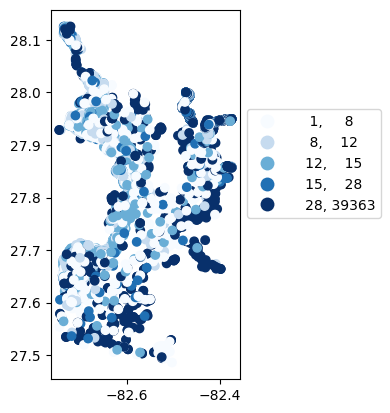

In [12]:
# Map number of usable results at each station
gdf_count = visualize.map_counts(df_harmonized, stations_gdf)
legend_kwds={"fmt": "{:.0f}", 'bbox_to_anchor':(1, 0.75)}
gdf_count.plot(column='cnt', cmap='Blues', legend=True, scheme='quantiles', legend_kwds=legend_kwds)

<Axes: >

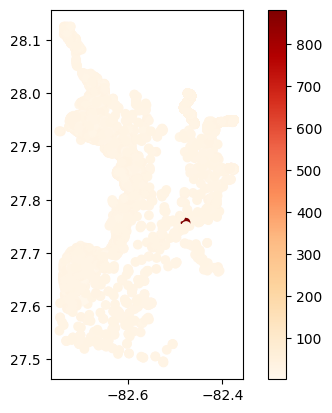

In [13]:
# Map average temperature results at each station
gdf_temperature = visualize.map_measure(df_harmonized, stations_gdf, 'Temperature')
gdf_temperature.plot(column='mean', cmap='OrRd', legend=True)

##### Clean additional columns of data

In [14]:
from harmonize_wq import clean

In [15]:
df_cleaned = clean.datetime(df_harmonized)  # datetime
df_cleaned = clean.harmonize_depth(df_cleaned)  # Sample depth

##### Reduce data to the columns that are most commonly needed

There are many columns in the dataframe that are characteristic specific, that is they have different values for the same sample depending on the characteristic. To ensure one result for each sample after the transformation of the data these columns must either be split, generating a new column for each characteristic with values, or moved out from the table if not being used.

In [16]:
# Split single QA column into multiple by characteristic (rename the result to preserve these QA_flags)
df_expanded = wrangle.split_col(df_cleaned)
df_expanded

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,QA_Temperature,QA_Fecal_Coliform,QA_Secchi,QA_Salinity,QA_pH,QA_E_coli,QA_Carbon,QA_Conductivity,QA_Chlorophyll,QA_Turbidity
0,21FLHILL_WQX,Environmental Protection Commission of Hillsbo...,21FLHILL_WQX-130612585-W,2013-06-12,11:01:00,EST,21FLHILL_WQX-585,STORET-301235413,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21FLSEAS_WQX,Florida Department of Environmental Protection,21FLSEAS_WQX-481901119134,2013-11-19,14:01:00,EST,21FLSEAS_WQX-48SEAS190,STORET-310535134,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21FLHILL_WQX,Environmental Protection Commission of Hillsbo...,21FLHILL_WQX-130702047-M,2013-07-02,11:01:00,EST,21FLHILL_WQX-047,STORET-300620295,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21FLHILL_WQX,Environmental Protection Commission of Hillsbo...,21FLHILL_WQX-130716021,2013-07-16,11:01:00,EST,21FLHILL_WQX-021,STORET-300666279,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21FLHILL_WQX,Environmental Protection Commission of Hillsbo...,21FLHILL_WQX-131216112-M,2013-12-16,12:01:00,EST,21FLHILL_WQX-112,STORET-301229196,NaN,NaN,...,NaN,NaN,NaN,NaN,"ResultMeasure/MeasureUnitCode: MISSING UNITS, ...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531360,21FLBSG,City of Tampa Bay Study Group (Florida),21FLBSG-1979311F-1979-0,1979-10-31,00:00:00,EST,21FLBSG-13,STORET-100013954247.0000000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1531361,21FLBSG,City of Tampa Bay Study Group (Florida),21FLBSG-1979174-1979-0,1979-09-17,00:00:00,EST,21FLBSG-13,STORET-100013931237.0000000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1531362,21FLBSG,City of Tampa Bay Study Group (Florida),21FLBSG-1979192F-1979-0,1979-11-19,00:00:00,EST,21FLBSG-13,STORET-100014001269.0000000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1531363,21FLBSG,City of Tampa Bay Study Group (Florida),21FLBSG-1979170-1979-0,1979-10-17,00:00:00,EST,21FLBSG-13,STORET-100013991881.0000000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Split table into main with columns of interest and characteristic specific columns/metadata
main_df, chars_df = wrangle.split_table(df_expanded)

In [18]:
# Drop empty columns (QA columns without flags)
main_df_small = main_df.dropna(axis=1, how='all')

##### Transform data from long to wide format

In [19]:
transformed_df = wrangle.collapse_results(main_df_small)

Results are collapsed by retaining the first result that isn't NAN. There can be several reasons for multiple results for the same parameter/characteristic sampled at the same station, time and by the same organization. The collapse_results function assumes the user has already reviewed the quality of all results and narrowed down instances of multiple results to only the desired/best/highest quality result before running this function.